In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("emotions_50.csv")
df

,Unnamed: 0,text,label
0,305154,i feel pleasant staying away from the former,1
1,53638,i just feel helpless right now though,0
2,53323,i am happy to be here on our farm and i feel o...,1
3,144955,i feel like its rude to draft someone into a h...,3
4,241468,i feel that it did not quite linger on that fe...,4
...,...,...,...
49995,214160,i feel doubtful and uncertain we have the figh...,4
49996,171650,i was really feeling cruddy and sten s parents...,1
49997,23683,i had a feeling it was youres i smile at my co...,1
49998,414287,i turned her into an ogre and got shirty becau...,0


In [4]:
X = df.text
y = df.label

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(45000,)
(5000,)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  263900


In [8]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(45000, 263900)
(5000, 263900)


In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[Text(332.7510581845973, 217.10650306748465, 'X[101205] <= 0.041\ngini = 0.76\nsamples = 45000\nvalue = [13011, 15310, 3751, 6221, 5115, 1592]'),
 Text(331.3825443349509, 216.439509202454, 'X[113918] <= 0.039\ngini = 0.759\nsamples = 44822\nvalue = [13009, 15308, 3749, 6219, 4945, 1592]'),
 Text(329.7795632452517, 215.7725153374233, 'X[52444] <= 0.033\ngini = 0.758\nsamples = 44650\nvalue = [13007, 15305, 3749, 6219, 4778, 1592]'),
 Text(327.91555622053914, 215.10552147239264, 'X[109483] <= 0.041\ngini = 0.757\nsamples = 44481\nvalue = [13000, 15300, 3748, 6217, 4778, 1438]'),
 Text(326.17212373790295, 214.43852760736195, 'X[213228] <= 0.04\ngini = 0.756\nsamples = 44326\nvalue = [12998, 15296, 3747, 6215, 4778, 1292]'),
 Text(323.5924960603055, 213.7715337423313, 'X[196601] <= 0.038\ngini = 0.755\nsamples = 44169\nvalue = [12997, 15296, 3594, 6214, 4776, 1292]'),
 Text(319.3404779927858, 213.10453987730062, 'X[165382] <= 0.037\ngini = 0.753\nsamples = 43990\nvalue = [12992, 15292, 359

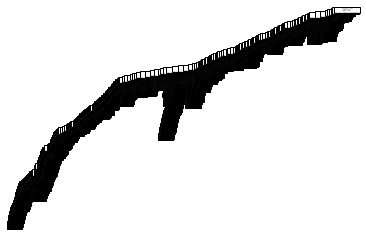

In [10]:
tree.plot_tree(clf)

Accuracy Score        :  0.8658
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1458
           1       0.90      0.88      0.89      1639
           2       0.79      0.82      0.80       449
           3       0.87      0.88      0.87       700
           4       0.82      0.85      0.84       571
           5       0.75      0.74      0.75       183

    accuracy                           0.87      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.87      0.87      0.87      5000



<Axes: >

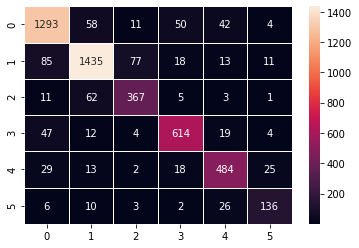

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [12]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)

Micro Precision: 0.8658
Micro Recall: 0.8658
Macro Precision: 0.8361381478163495
Macro Recall: 0.8412808430525772


In [13]:
# K folds cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2, shuffle = True)

In [14]:
from sklearn. model_selection import cross_val_score
from numpy import mean, std
modelTree = tree.DecisionTreeClassifier()
scores = cross_val_score(modelTree,X_test, y_test, scoring="accuracy", cv=kf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.817 (0.010)


In [15]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ["best", "random"],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [i for i in range(1,5)]
} 


clf = tree.DecisionTreeClassifier()
gs_svm_result = GridSearchCV(clf, param_grid,cv=kf).fit(X_test, y_test)
print(gs_svm_result.best_score_)

/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test pa

0.8305999999999999


In [16]:
test = gs_svm_result.best_estimator_.score(X_test, y_test)
gs_svm_result.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [17]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter='random')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy Score        :  0.8634
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1458
           1       0.89      0.89      0.89      1639
           2       0.80      0.79      0.80       449
           3       0.87      0.85      0.86       700
           4       0.83      0.84      0.83       571
           5       0.74      0.70      0.72       183

    accuracy                           0.86      5000
   macro avg       0.84      0.83      0.83      5000
weighted avg       0.86      0.86      0.86      5000



<Axes: >

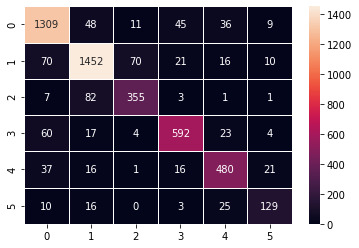

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)

Micro Precision: 0.8634
Micro Recall: 0.8634
Macro Precision: 0.8350212637109843
Macro Recall: 0.8276033206628393
